**OBJECTIVE**
The objective of this analysis is to create a pricing strategy for the company XYZ using the available datasets.The datasets used in this data analysis are Historical sales,Ads performance,Returns data,Competitor data,Pricing data and Inventory health.The goal is to create a more systematic, data-driven pricing approach that can adapt to changing conditions and support better operational decisions.

In [1]:
from google.colab import files
files.upload()

Saving Returns_Data.csv to Returns_Data.csv
Saving Pricing_Data.csv to Pricing_Data.csv
Saving Inventory_Health.csv to Inventory_Health.csv
Saving Historical_Sales.csv to Historical_Sales.csv
Saving Competitor_Data.csv to Competitor_Data.csv
Saving Ads_Performance.csv to Ads_Performance.csv


{'Returns_Data.csv': b'SKU,"Return Quantity \n(Last 7 days)","Return Quantity \n(Last 30 days)","Return Quantity \n(Last 60 days)","Return Quantity \n(Last 90 days)"\r\nMN-01,0,9,18,26\r\nMN-02,0,4,14,24\r\nMN-03,1,4,10,13\r\nMN-04,1,4,6,16\r\nMN-09,0,2,7,11\r\nMN-08,0,3,4,6\r\nMN-10,2,9,11,19\r\nMN-11,3,6,8,10\r\nMN-12,4,13,17,24\r\nMN-13,2,4,11,16\r\nMN-14,23,79,112,145\r\nMN-15,16,44,79,111\r\nMN-16,2,10,23,31\r\nMN-17,-,2,6,15\r\nMN-18,6,18,40,53\r\nMN-19,7,24,40,59\r\nMN-20,8,22,51,81\r\nMN-21,7,25,38,51\r\nMN-22,8,21,32,45\r\nMN-23,7,22,44,66\r\nMN-24,0,8,34,43\r\nMN-25,21,73,126,167\r\nMN-26,12,30,99,119\r\nMN-27,8,21,34,50\r\nMN-28,11,45,101,137\r\nMN-29,16,72,142,237\r\nMN-30,1,8,20,33\r\nMN-31,2,7,15,29\r\nMN-32,11,16,21,28\r\nMN-33,3,13,24,28\r\nMN-34,6,14,21,44\r\nMN-35,2,8,20,28\r\nMN-36,6,36,68,96\r\nMN-37,5,9,18,24\r\nMN-38,1,21,42,67\r\nMN-39,12,4,7,10\r\nMN-40,9,38,63,98\r\nMN-41,7,12,28,57\r\nMN-42,5,28,48,83\r\nMN-43,3,5,12,16\r\nMN-44,2,7,11,17\r\nMN-48,1,1,2,7\r\nM

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [3]:
sales=pd.read_csv("Historical_Sales.csv")
sales.head()
sales.info()
sales.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4243 entries, 0 to 4242
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   4243 non-null   object 
 1   SKU                    4243 non-null   object 
 2   Sessions - Total       4239 non-null   float64
 3   Page Views - Total     4239 non-null   float64
 4   Units Ordered          4239 non-null   float64
 5   Ordered Product Sales  4239 non-null   float64
 6   Total Order Items      4239 non-null   float64
dtypes: float64(5), object(2)
memory usage: 232.2+ KB


,Sessions - Total,Page Views - Total,Units Ordered,Ordered Product Sales,Total Order Items
count,4239.000000,4239.000000,4239.000000,4239.000000,4239.000000
mean,32.271526,43.857985,9.491389,316.735426,6.993631
std,34.058234,47.182596,11.765880,456.908734,8.477587
min,0.000000,0.000000,1.000000,0.000000,1.000000
25%,12.000000,16.000000,2.000000,65.060000,2.000000
50%,21.000000,28.000000,5.000000,156.500000,4.000000
75%,38.000000,53.000000,12.000000,374.455000,9.000000
max,600.000000,715.000000,108.000000,4053.500000,86.000000


In [4]:
sales.columns = (
    sales.columns
    .str.strip()
    .str.lower()
    .str.replace(r'[\s\-]+', '_', regex=True)
)
sales.columns = sales.columns.str.replace(r'_+', '_', regex=True)


sales.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4243 entries, 0 to 4242
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   4243 non-null   object 
 1   sku                    4243 non-null   object 
 2   sessions_total         4239 non-null   float64
 3   page_views_total       4239 non-null   float64
 4   units_ordered          4239 non-null   float64
 5   ordered_product_sales  4239 non-null   float64
 6   total_order_items      4239 non-null   float64
dtypes: float64(5), object(2)
memory usage: 232.2+ KB


In [5]:
#Change the format of the date column and remove null values
sales['date'] = pd.to_datetime(sales['date'], errors='coerce').dt.date



In [6]:
#remove nulls from all the columns
sales=sales.dropna(subset=['date'])
sales=sales.dropna(subset=['sku'])







In [7]:
sales['sessions_total'] = sales['sessions_total'].fillna(0)
sales['page_views_total'] = sales['page_views_total'].fillna(0)
sales['units_ordered'] = sales['units_ordered'].fillna(0)
sales['ordered_product_sales'] = sales['ordered_product_sales'].fillna(0)
sales['total_order_items'] = sales['total_order_items'].fillna(0)


In [8]:
ads=pd.read_csv('Ads_Performance.csv')
ads.head()
ads.info()
ads.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12777 entries, 0 to 12776
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                12777 non-null  object 
 1   SKU                 12777 non-null  object 
 2   impressions         12777 non-null  int64  
 3   clicks              12777 non-null  int64  
 4   costPerClick        9069 non-null   float64
 5   clickThroughRate    12715 non-null  float64
 6   cost                12777 non-null  float64
 7   spend               12777 non-null  float64
 8   currency-code       12777 non-null  object 
 9   purchases1d         12777 non-null  int64  
 10  purchases7d         12777 non-null  int64  
 11  purchases14d        12777 non-null  int64  
 12  purchases30d        12777 non-null  int64  
 13  unitsSoldClicks1d   12777 non-null  int64  
 14  unitsSoldClicks7d   12777 non-null  int64  
 15  unitsSoldClicks14d  12777 non-null  int64  
 16  unit

,impressions,clicks,costPerClick,clickThroughRate,cost,spend,purchases1d,purchases7d,purchases14d,purchases30d,unitsSoldClicks1d,unitsSoldClicks7d,unitsSoldClicks14d,unitsSoldClicks30d,sales1d,sales7d,sales14d,sales30d,acosClicks7d,acosClicks14d,roasClicks7d,roasClicks14d
count,12777.000000,12777.000000,9069.000000,12715.000000,12777.000000,12777.000000,12777.000000,12777.000000,12777.000000,12777.000000,12777.000000,12777.000000,12777.000000,12777.000000,12777.000000,12777.000000,12777.000000,12777.000000,4843.000000,4851.000000,9069.000000,9069.000000
mean,796.571026,5.626751,2.191240,0.831648,13.531852,13.531852,1.130234,1.309071,1.315332,1.315332,1.549503,1.777647,1.788057,1.788057,56.362388,64.687203,65.103347,65.103347,25.565322,25.483196,6.159109,6.198352
std,1262.897665,10.281758,1.581214,2.310908,33.079770,33.079770,2.776496,3.118467,3.131592,3.131592,4.203300,4.656646,4.682700,4.682700,169.531657,188.464252,189.510737,189.510737,27.022338,26.889473,21.473840,21.551940
min,0.000000,0.000000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,89.000000,0.000000,1.003000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.038447,8.979509,0.000000,0.000000
50%,334.000000,2.000000,1.615000,0.540000,3.330000,3.330000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.904143,17.758081,1.503778,1.523104
75%,952.000000,7.000000,3.083000,0.993000,11.260000,11.260000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,35.490000,43.980000,44.370000,44.370000,32.464382,32.387541,6.021091,6.048832
max,15928.000000,114.000000,13.130000,100.000000,636.840000,636.840000,39.000000,43.000000,43.000000,43.000000,71.000000,78.000000,78.000000,78.000000,2847.510000,3114.370000,3114.370000,3114.370000,313.050518,313.050518,937.250000,937.250000


In [9]:
ads.columns = (
    ads.columns
    .str.strip()
    .str.lower()
    .str.replace(r'[\s\-]+', '_', regex=True)
    .str.replace(r'_+', '_', regex=True)
)
ads.columns.tolist()


['date',
 'sku',
 'impressions',
 'clicks',
 'costperclick',
 'clickthroughrate',
 'cost',
 'spend',
 'currency_code',
 'purchases1d',
 'purchases7d',
 'purchases14d',
 'purchases30d',
 'unitssoldclicks1d',
 'unitssoldclicks7d',
 'unitssoldclicks14d',
 'unitssoldclicks30d',
 'sales1d',
 'sales7d',
 'sales14d',
 'sales30d',
 'acosclicks7d',
 'acosclicks14d',
 'roasclicks7d',
 'roasclicks14d']

In [10]:
ads['date'] = pd.to_datetime(ads['date'], errors='coerce').dt.date
ads['date'].isna().sum()
ads = ads.dropna(subset=['date'])


In [11]:
ads.isna().sum()

,0
date,0
sku,0
impressions,0
clicks,0
costperclick,3706
clickthroughrate,62
cost,0
spend,0
currency_code,0
purchases1d,0


In [12]:
rate_cols = [
    'costperclick',
    'clickthroughrate',
    'acosclicks7d','acosclicks14d','roasclicks7d','roasclicks14d'
]

ads[rate_cols] = ads[rate_cols].fillna(0)
ads.isna().sum()


,0
date,0
sku,0
impressions,0
clicks,0
costperclick,0
clickthroughrate,0
cost,0
spend,0
currency_code,0
purchases1d,0


In [13]:
competitor=pd.read_csv('Competitor_Data.csv')
competitor.head()
competitor.info()
competitor.describe()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   SKU                       50 non-null     object
 1   Avg_Competitor_Price      49 non-null     object
 2   Lowest_Competitor_Price   50 non-null     object
 3   Highest_Competitor_Price  50 non-null     object
 4   Competitor_Count          50 non-null     int64 
dtypes: int64(1), object(4)
memory usage: 2.1+ KB


,Competitor_Count
count,50.000000
mean,7.360000
std,1.425139
min,3.000000
25%,6.250000
50%,8.000000
75%,8.000000
max,10.000000


In [14]:
competitor.columns = (
    competitor.columns
    .str.strip()
    .str.lower()
    .str.replace(r'[\s\-]+', '_', regex=True)
    .str.replace(r'_+', '_', regex=True)
)
competitor.columns.tolist()

['sku',
 'avg_competitor_price',
 'lowest_competitor_price',
 'highest_competitor_price',
 'competitor_count']

In [15]:
competitor['avg_competitor_price'] = (
    competitor['avg_competitor_price']
    .replace(r'[\$,]', '', regex=True)
    .astype(float)
)
competitor['lowest_competitor_price'] = (
    competitor['lowest_competitor_price']
    .replace(r'[\$,]', '', regex=True)
    .astype(float)
)
competitor.head()

competitor['highest_competitor_price'] = competitor['highest_competitor_price'].replace(
    r'[\$,-]+', '', regex=True
)
competitor['highest_competitor_price'] = pd.to_numeric(
    competitor['highest_competitor_price'],
    errors='coerce'
)
competitor.isna().sum()






,0
sku,0
avg_competitor_price,1
lowest_competitor_price,0
highest_competitor_price,1
competitor_count,0


In [16]:
competitor=competitor.dropna(subset=['avg_competitor_price'])
competitor=competitor.dropna(subset=['highest_competitor_price'])
competitor.isna().sum()
competitor.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48 entries, 0 to 49
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   sku                       48 non-null     object 
 1   avg_competitor_price      48 non-null     float64
 2   lowest_competitor_price   48 non-null     float64
 3   highest_competitor_price  48 non-null     float64
 4   competitor_count          48 non-null     int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 2.2+ KB


In [17]:
inventory=pd.read_csv('Inventory_Health.csv')
inventory.head()
inventory.info()
inventory.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   SKU                      50 non-null     object 
 1   condition                50 non-null     object 
 2   total-inventory          48 non-null     float64
 3   available                50 non-null     int64  
 4   inbound-shipped          50 non-null     int64  
 5   inbound-received         50 non-null     int64  
 6   reserved-quantity        50 non-null     int64  
 7   unfulfillable-quantity   50 non-null     int64  
 8   inv-age-0-to-30-days     50 non-null     int64  
 9   inv-age-31-to-60-days    50 non-null     int64  
 10  inv-age-61-to-90-days    50 non-null     int64  
 11  inv-age-181-to-330-days  50 non-null     int64  
 12  inv-age-331-to-365-days  50 non-null     int64  
 13  inv-age-365-plus-days    50 non-null     int64  
 14  currency                 50 

,total-inventory,available,inbound-shipped,inbound-received,reserved-quantity,unfulfillable-quantity,inv-age-0-to-30-days,inv-age-31-to-60-days,inv-age-61-to-90-days,inv-age-181-to-330-days,inv-age-331-to-365-days,inv-age-365-plus-days,units-shipped-t7,units-shipped-t30,units-shipped-t60,units-shipped-t90,sell-through,item-volume,storage-volume,days-of-supply,weeks-of-cover-t30,weeks-of-cover-t90
count,48.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.00000,50.000000,50.0,50.0,50.000000,50.000000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,488.500000,316.060000,105.00000,12.440000,47.800000,2.340000,160.500000,207.860000,25.88000,0.340000,0.0,0.0,70.320000,308.700000,544.400000,780.240000,1.55480,0.290333,92.797665,77.600000,8.580000,9.760000
std,394.451518,284.894281,176.70187,28.095435,41.893938,4.533819,193.035394,256.338584,53.64039,2.404163,0.0,0.0,64.390847,311.913858,576.909323,789.173853,0.47654,0.179913,97.073248,31.653739,14.245787,12.704748
min,18.000000,0.000000,0.00000,0.000000,3.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.0,0.0,2.000000,10.000000,18.000000,36.000000,0.36000,0.017404,0.000000,0.000000,0.000000,0.000000
25%,215.500000,112.500000,0.00000,0.000000,16.500000,0.000000,23.500000,49.000000,0.00000,0.000000,0.0,0.0,24.000000,120.500000,180.750000,266.500000,1.28750,0.161145,24.624434,63.250000,4.250000,6.000000
50%,350.500000,235.500000,60.00000,4.500000,40.000000,1.000000,83.000000,117.500000,0.00000,0.000000,0.0,0.0,47.500000,197.000000,322.000000,467.000000,1.58000,0.274906,58.446105,79.500000,6.000000,8.000000
75%,679.250000,390.750000,115.00000,11.500000,67.750000,2.000000,222.750000,222.500000,42.50000,0.000000,0.0,0.0,104.250000,453.000000,688.500000,1159.500000,1.80750,0.376449,143.323204,89.750000,8.000000,10.000000
max,1645.000000,1079.000000,1100.00000,181.000000,234.000000,25.000000,764.000000,1202.000000,258.00000,17.000000,0.0,0.0,249.000000,1729.000000,3336.000000,4300.000000,3.18000,0.912420,446.926284,159.000000,98.000000,89.000000


In [18]:
inventory.columns = (
    inventory.columns
    .str.strip()
    .str.lower()
    .str.replace(r'[\s\-]+', '_', regex=True)
    .str.replace(r'_+', '_', regex=True)
)
inventory.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   sku                      50 non-null     object 
 1   condition                50 non-null     object 
 2   total_inventory          48 non-null     float64
 3   available                50 non-null     int64  
 4   inbound_shipped          50 non-null     int64  
 5   inbound_received         50 non-null     int64  
 6   reserved_quantity        50 non-null     int64  
 7   unfulfillable_quantity   50 non-null     int64  
 8   inv_age_0_to_30_days     50 non-null     int64  
 9   inv_age_31_to_60_days    50 non-null     int64  
 10  inv_age_61_to_90_days    50 non-null     int64  
 11  inv_age_181_to_330_days  50 non-null     int64  
 12  inv_age_331_to_365_days  50 non-null     int64  
 13  inv_age_365_plus_days    50 non-null     int64  
 14  currency                 50 

In [19]:
inventory.isna().sum()

,0
sku,0
condition,0
total_inventory,2
available,0
inbound_shipped,0
inbound_received,0
reserved_quantity,0
unfulfillable_quantity,0
inv_age_0_to_30_days,0
inv_age_31_to_60_days,0


In [20]:
inventory['total_inventory'] = (
    inventory['available']
    + inventory['reserved_quantity']
    + inventory['unfulfillable_quantity']
)
inventory.isna().sum()

,0
sku,0
condition,0
total_inventory,0
available,0
inbound_shipped,0
inbound_received,0
reserved_quantity,0
unfulfillable_quantity,0
inv_age_0_to_30_days,0
inv_age_31_to_60_days,0


In [21]:
returns=pd.read_csv('Returns_Data.csv')
returns.head()
returns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   SKU                              50 non-null     object
 1   Return Quantity 
(Last 7 days)   50 non-null     object
 2   Return Quantity 
(Last 30 days)  50 non-null     int64 
 3   Return Quantity 
(Last 60 days)  50 non-null     int64 
 4   Return Quantity 
(Last 90 days)  50 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [22]:
returns.columns = (
    returns.columns
    .str.strip()
    .str.lower()
    .str.replace(r'[\s\-\()]+', '_', regex=True)
    .str.replace(r'_+', '_', regex=True)
)

returns.columns.tolist()


['sku',
 'return_quantity_last_7_days_',
 'return_quantity_last_30_days_',
 'return_quantity_last_60_days_',
 'return_quantity_last_90_days_']

In [23]:
returns['return_quantity_last_7_days_'] = pd.to_numeric(
    returns['return_quantity_last_7_days_'],
    errors='coerce'
)
returns.info()
returns['return_quantity_last_7_days_']=returns['return_quantity_last_7_days_'].fillna(0)
returns.isna().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   sku                            50 non-null     object 
 1   return_quantity_last_7_days_   49 non-null     float64
 2   return_quantity_last_30_days_  50 non-null     int64  
 3   return_quantity_last_60_days_  50 non-null     int64  
 4   return_quantity_last_90_days_  50 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ KB


,0
sku,0
return_quantity_last_7_days_,0
return_quantity_last_30_days_,0
return_quantity_last_60_days_,0
return_quantity_last_90_days_,0


In [24]:
pricing=pd.read_csv('Pricing_Data.csv')
pricing.head()
pricing.info()
pricing.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   SKU                          50 non-null     object
 1   Product_description          50 non-null     object
 2   Product Role                 50 non-null     object
 3   Country_of_Origin            50 non-null     object
 4   FBA Fee                      50 non-null     object
 5   Storage Fee                  50 non-null     object
 6   Handling_Cost                49 non-null     object
 7   Cost                         50 non-null     object
 8   Current_Price                50 non-null     object
 9   Minimum_Acceptable_Margin_%  50 non-null     object
 10  Target_Gross_Margin_%        50 non-null     object
dtypes: object(11)
memory usage: 4.4+ KB


,SKU,Product_description,Product Role,Country_of_Origin,FBA Fee,Storage Fee,Handling_Cost,Cost,Current_Price,Minimum_Acceptable_Margin_%,Target_Gross_Margin_%
count,50,50,50,50,50,50,49,50,50,50,50
unique,50,50,2,1,46,34,1,17,26,2,2
top,MN-01,Rectangle Tray -14 x 10 Inch - Pk of 25,Core,India,$12.89,$0.30,$0.75,$11.00,$29.90,20%,35%
freq,1,1,46,50,2,4,49,8,8,46,46


In [25]:
pricing.columns = (
    pricing.columns
    .str.strip()
    .str.lower()
    .str.replace(r'[\s\-\%]+', '_', regex=True)
    .str.replace(r'_+', '_', regex=True)
)

pricing.columns.tolist()

['sku',
 'product_description',
 'product_role',
 'country_of_origin',
 'fba_fee',
 'storage_fee',
 'handling_cost',
 'cost',
 'current_price',
 'minimum_acceptable_margin_',
 'target_gross_margin_']

In [26]:
pricing['fba_fee'] = pricing['fba_fee'].replace(
    r'[\$,-]+', '', regex=True
)
pricing['fba_fee'] = pd.to_numeric(
    pricing['fba_fee'],
    errors='coerce'
)
pricing['storage_fee'] = pricing['storage_fee'].replace(
    r'[\$,-]+', '', regex=True)

pricing['storage_fee'] = pd.to_numeric(
    pricing['storage_fee'],
    errors='coerce'
)

pricing['handling_cost'] = pricing['handling_cost'].replace(
    r'[\$,-]+', '', regex=True)

pricing['handling_cost'] = pd.to_numeric(
    pricing['handling_cost'],
    errors='coerce'
)

pricing['cost'] = pricing['cost'].replace(
    r'[\$,-]+', '', regex=True)

pricing['cost'] = pd.to_numeric(
    pricing['cost'],
    errors='coerce'
)

pricing['current_price'] = pricing['current_price'].replace(
    r'[\$,-]+', '', regex=True)

pricing['current_price'] = pd.to_numeric(
    pricing['current_price'],
    errors='coerce'
)



In [27]:
pricing['minimum_acceptable_margin_'] = (
    pricing['minimum_acceptable_margin_']
    .astype(str)
    .str.replace('%', '', regex=False)
    .str.strip()
)
pricing['minimum_acceptable_margin_'] = pd.to_numeric(
    pricing['minimum_acceptable_margin_'],
    errors='coerce'
)

pricing['minimum_acceptable_margin_'] = (
    pricing['minimum_acceptable_margin_'] / 100
)




In [28]:
pricing['target_gross_margin_'] = pricing['target_gross_margin_'].replace(
    r'[\%,-]+', '', regex=True
)
pricing['target_gross_margin_'] = pd.to_numeric(
    pricing['target_gross_margin_'],
    errors='coerce'
)

In [29]:
pricing['handling_cost']=pricing['handling_cost'].fillna(0)
pricing.isna().sum()

,0
sku,0
product_description,0
product_role,0
country_of_origin,0
fba_fee,0
storage_fee,0
handling_cost,0
cost,0
current_price,0
minimum_acceptable_margin_,0


In [30]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4212 entries, 0 to 4242
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   4212 non-null   object 
 1   sku                    4212 non-null   object 
 2   sessions_total         4212 non-null   float64
 3   page_views_total       4212 non-null   float64
 4   units_ordered          4212 non-null   float64
 5   ordered_product_sales  4212 non-null   float64
 6   total_order_items      4212 non-null   float64
dtypes: float64(5), object(2)
memory usage: 263.2+ KB


In [31]:
#Grouping and aggregating the sales table as per SKU
sales_sku = (
    sales
    .groupby('sku', as_index=False)
    .agg(
        total_units_sold=('units_ordered', 'sum'),
        total_revenue=('ordered_product_sales', 'sum'),
        total_order_items=('total_order_items', 'sum'),
        total_sessions=('sessions_total', 'sum'),
        total_page_views=('page_views_total', 'sum')
    )
)


In [32]:
#Create required metrics for the sales table
#1.Average selling price
sales_sku['avg_selling_price'] = (
    sales_sku['total_revenue'] / sales_sku['total_units_sold']
).replace([np.inf, -np.inf], 0)

#2.Conversion rate
sales_sku['conversion_rate']=(sales_sku['total_units_sold']/sales_sku['total_sessions']).replace([np.inf,-np.inf],0)

#3.Average daily units sold
total_days= sales['date'].nunique()
sales_sku['avg_daily_units_sold'] = (
   sales_sku['total_units_sold'] / total_days
)

#4.Revenue share
sales_sku['revenue_share'] = (
    sales_sku['total_revenue'] / sales_sku['total_revenue'].sum()
)

#5.Rolling velocity(Sales for 30 days)
daily_sales = (
    sales
    .groupby(['sku', 'date'], as_index=False)
    .agg(
        units_sold=('units_ordered', 'sum')
    )
)
daily_sales = daily_sales.sort_values(['sku', 'date'])

daily_sales['sales_velocity_30d'] = (
    daily_sales
    .groupby('sku')['units_sold']
    .rolling(window=30, min_periods=1)
    .mean()
    .reset_index(level=0, drop=True)
)

velocity_sku = (
    daily_sales
    .groupby('sku', as_index=False)
    .tail(1)[['sku', 'sales_velocity_30d']]
)

sales_sku = sales_sku.drop(
    columns=['sales_velocity_30d_x', 'sales_velocity_30d_y'],
    errors='ignore'
)


velocity_sku.head()
velocity_sku['sku'].is_unique

sales_sku = sales_sku.drop(
    columns=['sales_velocity_30d', 'sales_velocity_30d_x', 'sales_velocity_30d_y'],
    errors='ignore'
)
sales_sku = sales_sku.merge(
    velocity_sku,
    on='sku',
    how='left'
)
sales_sku[['sku', 'sales_velocity_30d']].head()
sales_sku['sales_velocity_30d'].isna().sum()




















np.int64(0)

In [33]:
ads['sku'].is_unique

ads_sku = (
    ads
    .groupby('sku', as_index=False)
    .agg(
        total_impressions=('impressions', 'sum'),
        total_clicks=('clicks', 'sum'),
        total_ad_spend=('spend', 'sum'),
        ad_purchases_30d=('purchases30d', 'sum'),
        ad_units_sold_30d=('unitssoldclicks30d', 'sum'),
        ad_sales_30d=('sales30d', 'sum')
    )
)

ads.info()






<class 'pandas.core.frame.DataFrame'>
Index: 12771 entries, 0 to 12776
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                12771 non-null  object 
 1   sku                 12771 non-null  object 
 2   impressions         12771 non-null  int64  
 3   clicks              12771 non-null  int64  
 4   costperclick        12771 non-null  float64
 5   clickthroughrate    12771 non-null  float64
 6   cost                12771 non-null  float64
 7   spend               12771 non-null  float64
 8   currency_code       12771 non-null  object 
 9   purchases1d         12771 non-null  int64  
 10  purchases7d         12771 non-null  int64  
 11  purchases14d        12771 non-null  int64  
 12  purchases30d        12771 non-null  int64  
 13  unitssoldclicks1d   12771 non-null  int64  
 14  unitssoldclicks7d   12771 non-null  int64  
 15  unitssoldclicks14d  12771 non-null  int64  
 16  unitssold

In [34]:
#Create required metrics on ads performance dataset

#1.ROAS
ads_sku['roas'] = (
    ads_sku['ad_sales_30d'] / ads_sku['total_ad_spend']
).replace([np.inf, -np.inf], 0)

#2.CTR
ads_sku['ctr'] = (
    ads_sku['total_clicks'] / ads_sku['total_impressions']
).replace([np.inf, -np.inf], 0)



In [35]:
#creating metrics on pricing dataset
#1.Adding total unit cost
pricing['total_unit_cost'] = pricing['cost'] + pricing['handling_cost']

pricing['target_gross_margin_']=pricing['target_gross_margin_']/100
#pricing = pricing.drop(columns=['target_gross_margin'])


pricing.isna().sum()





,0
sku,0
product_description,0
product_role,0
country_of_origin,0
fba_fee,0
storage_fee,0
handling_cost,0
cost,0
current_price,0
minimum_acceptable_margin_,0


In [36]:
returns['sku'].is_unique
returns.isna().sum()
returns.head()

,sku,return_quantity_last_7_days_,return_quantity_last_30_days_,return_quantity_last_60_days_,return_quantity_last_90_days_
0,MN-01,0.0,9,18,26
1,MN-02,0.0,4,14,24
2,MN-03,1.0,4,10,13
3,MN-04,1.0,4,6,16
4,MN-09,0.0,2,7,11


In [37]:
#merge the datasets into one master table
master=sales_sku.copy()
master=master.merge(inventory,on='sku',how='left')
master = master.merge(ads_sku,on='sku',how='left')
pricing_sku=pricing.copy()
master=master.merge(pricing_sku,on='sku',how='left')
competitor_sku=competitor.copy()
master=master.merge(competitor_sku,on='sku',how='left')
master=master.merge(returns,on='sku',how='left')
#master.head()
master['competitor_count'] = master['competitor_count'].fillna(0)
master.isna().sum().sort_values(ascending=False)







,0
avg_competitor_price,2
highest_competitor_price,2
lowest_competitor_price,2
sku,0
total_units_sold,0
...,...
competitor_count,0
return_quantity_last_7_days_,0
return_quantity_last_30_days_,0
return_quantity_last_60_days_,0


In [38]:
master['sku'].is_unique
master.shape
#master.isna().sum()[master.isna().sum() > 0]


(50, 65)

In [39]:
#Create metrics on the merged master data
#1.Inventory
master['days_of_inventory_cover'] = (
    master['total_inventory'] / master['avg_daily_units_sold']
).replace([np.inf, -np.inf], 0)

#2 Rate of return
master['return_rate_30d'] = (
    master['return_quantity_last_30_days_'] / master['total_units_sold']
).replace([np.inf, -np.inf], 0)

#3 Current margin
master['current_margin_pct'] = (
    (master['current_price'] - master['total_unit_cost']) /
    master['current_price']
)

#4. Competitor price
master['price_gap_pct'] = (
    (master['current_price'] - master['avg_competitor_price']) /
    master['avg_competitor_price']
)

#when competitor price is missing
master.loc[
    master['avg_competitor_price'].isna(),
    'price_gap_pct'
] = 0



master['avg_competitor_price'] = master['avg_competitor_price'].replace(0, np.nan)
master['price_gap_pct'] = (
    (master['current_price'] - master['avg_competitor_price']) /
    master['avg_competitor_price']
)
master.loc[
    master['avg_competitor_price'].isna(),
    'price_gap_pct'
] = 0

master[['days_of_inventory_cover',
        'return_rate_30d',
        'price_gap_pct',
        'current_margin_pct']].describe()









,days_of_inventory_cover,return_rate_30d,price_gap_pct,current_margin_pct
count,50.000000,50.000000,50.000000,50.000000
mean,54.153176,0.023525,-0.027612,0.568473
std,40.000701,0.013990,0.029923,0.068726
min,2.809605,0.002692,-0.070093,0.372146
25%,39.704857,0.015012,-0.047943,0.524221
50%,47.764067,0.019014,-0.036322,0.563197
75%,59.924867,0.029786,-0.011575,0.614177
max,240.012500,0.071429,0.054201,0.711055


In [40]:
#removing unwanted columns from master dataset
master=master.drop(columns=['condition','currency','volume_unit_measurement','storage_type','marketplace','country_of_origin'],errors='ignore')
master.head()
#master['sku'].is_unique


,sku,total_units_sold,total_revenue,total_order_items,total_sessions,total_page_views,avg_selling_price,conversion_rate,avg_daily_units_sold,revenue_share,sales_velocity_30d,total_inventory,available,inbound_shipped,inbound_received,reserved_quantity,unfulfillable_quantity,inv_age_0_to_30_days,inv_age_31_to_60_days,inv_age_61_to_90_days,inv_age_181_to_330_days,inv_age_331_to_365_days,inv_age_365_plus_days,units_shipped_t7,units_shipped_t30,units_shipped_t60,units_shipped_t90,sell_through,item_volume,storage_volume,days_of_supply,weeks_of_cover_t30,weeks_of_cover_t90,total_impressions,total_clicks,total_ad_spend,ad_purchases_30d,ad_units_sold_30d,ad_sales_30d,roas,ctr,product_description,product_role,fba_fee,storage_fee,handling_cost,cost,current_price,minimum_acceptable_margin_,target_gross_margin_,total_unit_cost,avg_competitor_price,lowest_competitor_price,highest_competitor_price,competitor_count,return_quantity_last_7_days_,return_quantity_last_30_days_,return_quantity_last_60_days_,return_quantity_last_90_days_,days_of_inventory_cover,return_rate_30d,current_margin_pct,price_gap_pct
0,MN-01,565.0,23679.44,456.0,1862.0,2412.0,41.910513,0.303437,6.208791,0.017743,6.733333,333,264,40,9,68,1,12,261,56,0,0,0,59,203,386,574,1.33,0.546781,144.350184,47,6,7,131593,985,2762.06,263,338,14258.43,5.162245,0.007485,Rectangle Tray -14 x 10 Inch - Pk of 25,Core,15.11,0.44,0.75,16.0,38.9,0.20,0.35,16.75,36.9,31.95,44.90,9.0,0.0,9,18,26,53.633628,0.015929,0.569409,0.054201
1,MN-02,406.0,14760.94,312.0,1790.0,2374.0,36.356995,0.226816,4.461538,0.011060,5.133333,224,206,80,2,18,0,127,91,17,0,0,0,29,155,261,417,1.56,0.373971,77.038026,85,7,8,226158,1298,2286.92,250,307,11664.02,5.100318,0.005739,Rectangle Tray -12x10 - Pk of 25,Core,13.55,0.30,0.75,12.0,33.9,0.20,0.35,12.75,32.5,27.90,39.95,8.0,0.0,4,14,24,50.206897,0.009852,0.623894,0.043077
2,MN-03,193.0,7243.02,150.0,851.0,1126.0,37.528601,0.226792,2.120879,0.005427,2.500000,99,95,40,0,3,1,42,8,62,0,0,0,13,67,116,179,1.16,0.425846,40.455370,83,8,9,74652,394,670.20,80,100,3675.34,5.483945,0.005278,Oval Tray -15x10 Inch - Pk of 25,Core,13.94,0.34,0.75,15.0,34.9,0.20,0.35,15.75,35.2,29.99,42.50,7.0,1.0,4,10,13,46.678756,0.020725,0.548711,-0.008523
3,MN-04,188.0,5914.32,124.0,593.0,766.0,31.459149,0.317032,2.065934,0.004432,2.600000,83,70,80,8,13,0,3,84,0,0,0,0,18,71,128,187,1.65,0.375575,26.290250,99,8,10,52363,231,903.79,60,69,2090.28,2.312794,0.004412,Oval Tray - 13x9 Inch - pk of 25,Core,12.89,0.30,0.75,12.0,29.9,0.20,0.35,12.75,28.4,24.50,35.90,6.0,1.0,4,6,16,40.175532,0.021277,0.573579,0.052817
4,MN-05,327.0,7700.36,289.0,1875.0,2946.0,23.548502,0.174400,3.593407,0.005770,9.400000,234,0,0,49,234,0,53,141,0,0,0,0,249,491,543,557,1.47,0.270417,0.000000,145,0,1,39306,390,637.85,54,65,1779.54,2.789904,0.009922,Christmas Tray - 17x12 Inch - Pk of 5,Seasonal,11.80,0.22,0.75,13.0,21.9,0.25,0.45,13.75,NaN,NaN,NaN,0.0,2.0,4,4,6,65.119266,0.012232,0.372146,0.000000


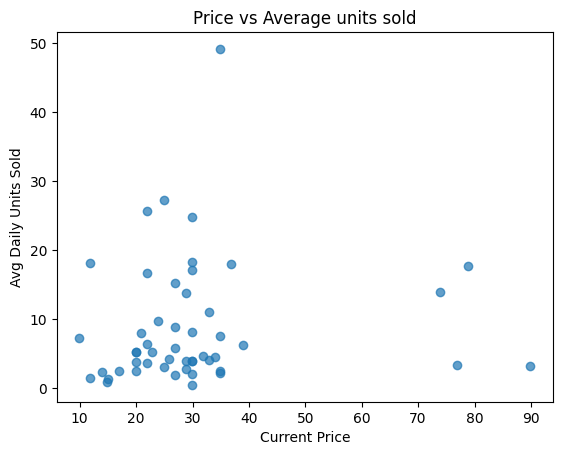

In [41]:
#Visualizations
plt.figure()
plt.scatter(master['current_price'],master['avg_daily_units_sold'],alpha=0.7)
plt.xlabel('Current Price')
plt.ylabel('Avg Daily Units Sold')
plt.title('Price vs Average units sold')

plt.show()


The above chart shows the relationship between Current Price and Average daily units sold for each SKU.Sales volume is high for low to moderate prices.Higher priced products tend to sell in less volume.This shows price sensitivity to the number of units sold.

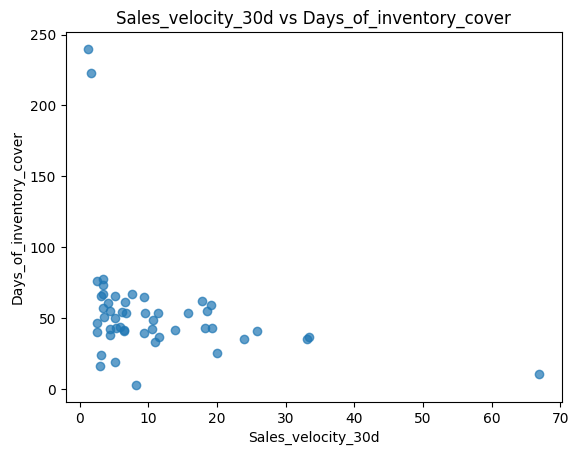

In [42]:
plt.figure()
plt.scatter(master['sales_velocity_30d'],master['days_of_inventory_cover'],alpha=0.7)
plt.xlabel('Sales_velocity_30d')
plt.ylabel('Days_of_inventory_cover')
plt.title('Sales_velocity_30d vs Days_of_inventory_cover')
plt.show()

The above plot shows the relationship between sales velocity and days of inventory cover.Higher sales velocity is associated with lower days of inventory cover which implies that with higher velocity of sales, the product will have only less days of inventory cover.Slow moving products tend to accumulate excess inventory.

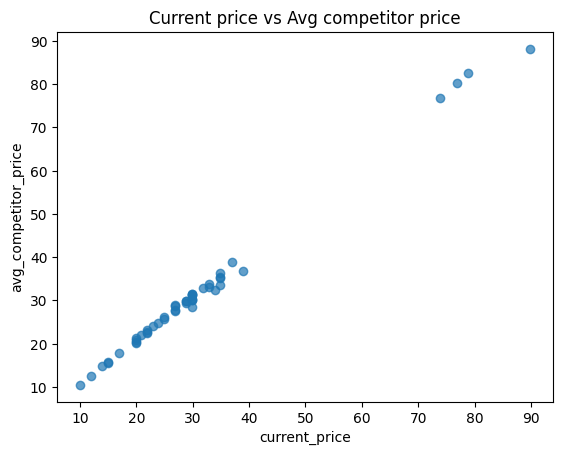

In [43]:
plt.figure()
plt.scatter(master['current_price'],master['avg_competitor_price'],alpha=0.7)
plt.xlabel('current_price')
plt.ylabel('avg_competitor_price')
plt.title('Current price vs Avg competitor price')
plt.show()

The above plot shows the relationship between Current price and average competitor price. The relationship is almost a linear relationship which implies that current prices closely track average competitor prices.Current prices are market aligned pricing as per the plot.

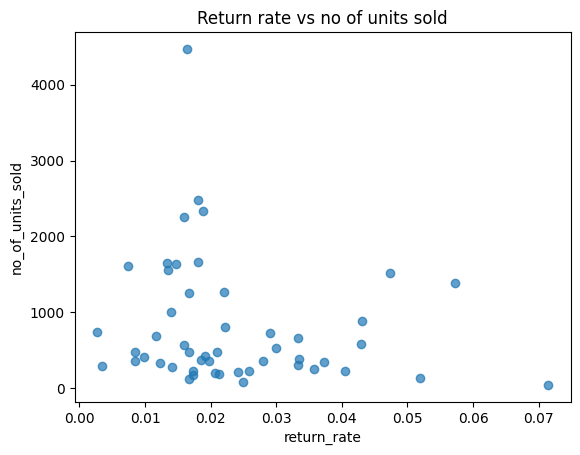

In [44]:
plt.figure()
plt.scatter(master['return_rate_30d'],master['total_units_sold'],alpha=0.7)
plt.xlabel('return_rate')
plt.ylabel('no_of_units_sold')
plt.title('Return rate vs no of units sold')
plt.show()

The above plot shows the relationship between return rate and number of units sold. The plot implies that products with lower return rate shows higher sales while products with higher return rate shows lower sales.

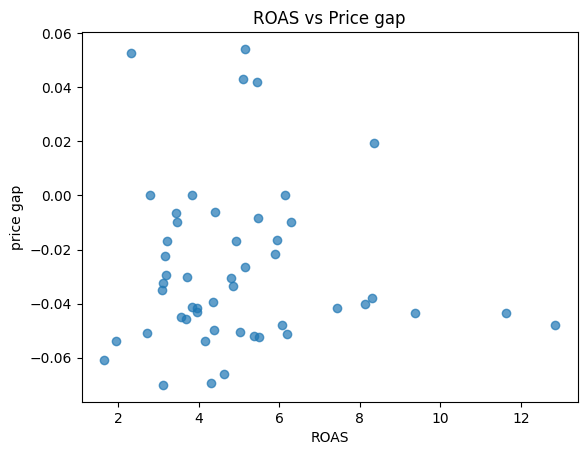

In [45]:
plt.figure()
plt.scatter(master['roas'],master['price_gap_pct'],alpha=0.7)
plt.xlabel('ROAS')
plt.ylabel('price gap')
plt.title('ROAS vs Price gap')
plt.show()

The above plot shows the relationship between ROAS and price gap. Ads perform better when the prices are below market level. And higher priced products tend to show lower ad efficiency.

In [46]:
master.head()

,sku,total_units_sold,total_revenue,total_order_items,total_sessions,total_page_views,avg_selling_price,conversion_rate,avg_daily_units_sold,revenue_share,sales_velocity_30d,total_inventory,available,inbound_shipped,inbound_received,reserved_quantity,unfulfillable_quantity,inv_age_0_to_30_days,inv_age_31_to_60_days,inv_age_61_to_90_days,inv_age_181_to_330_days,inv_age_331_to_365_days,inv_age_365_plus_days,units_shipped_t7,units_shipped_t30,units_shipped_t60,units_shipped_t90,sell_through,item_volume,storage_volume,days_of_supply,weeks_of_cover_t30,weeks_of_cover_t90,total_impressions,total_clicks,total_ad_spend,ad_purchases_30d,ad_units_sold_30d,ad_sales_30d,roas,ctr,product_description,product_role,fba_fee,storage_fee,handling_cost,cost,current_price,minimum_acceptable_margin_,target_gross_margin_,total_unit_cost,avg_competitor_price,lowest_competitor_price,highest_competitor_price,competitor_count,return_quantity_last_7_days_,return_quantity_last_30_days_,return_quantity_last_60_days_,return_quantity_last_90_days_,days_of_inventory_cover,return_rate_30d,current_margin_pct,price_gap_pct
0,MN-01,565.0,23679.44,456.0,1862.0,2412.0,41.910513,0.303437,6.208791,0.017743,6.733333,333,264,40,9,68,1,12,261,56,0,0,0,59,203,386,574,1.33,0.546781,144.350184,47,6,7,131593,985,2762.06,263,338,14258.43,5.162245,0.007485,Rectangle Tray -14 x 10 Inch - Pk of 25,Core,15.11,0.44,0.75,16.0,38.9,0.20,0.35,16.75,36.9,31.95,44.90,9.0,0.0,9,18,26,53.633628,0.015929,0.569409,0.054201
1,MN-02,406.0,14760.94,312.0,1790.0,2374.0,36.356995,0.226816,4.461538,0.011060,5.133333,224,206,80,2,18,0,127,91,17,0,0,0,29,155,261,417,1.56,0.373971,77.038026,85,7,8,226158,1298,2286.92,250,307,11664.02,5.100318,0.005739,Rectangle Tray -12x10 - Pk of 25,Core,13.55,0.30,0.75,12.0,33.9,0.20,0.35,12.75,32.5,27.90,39.95,8.0,0.0,4,14,24,50.206897,0.009852,0.623894,0.043077
2,MN-03,193.0,7243.02,150.0,851.0,1126.0,37.528601,0.226792,2.120879,0.005427,2.500000,99,95,40,0,3,1,42,8,62,0,0,0,13,67,116,179,1.16,0.425846,40.455370,83,8,9,74652,394,670.20,80,100,3675.34,5.483945,0.005278,Oval Tray -15x10 Inch - Pk of 25,Core,13.94,0.34,0.75,15.0,34.9,0.20,0.35,15.75,35.2,29.99,42.50,7.0,1.0,4,10,13,46.678756,0.020725,0.548711,-0.008523
3,MN-04,188.0,5914.32,124.0,593.0,766.0,31.459149,0.317032,2.065934,0.004432,2.600000,83,70,80,8,13,0,3,84,0,0,0,0,18,71,128,187,1.65,0.375575,26.290250,99,8,10,52363,231,903.79,60,69,2090.28,2.312794,0.004412,Oval Tray - 13x9 Inch - pk of 25,Core,12.89,0.30,0.75,12.0,29.9,0.20,0.35,12.75,28.4,24.50,35.90,6.0,1.0,4,6,16,40.175532,0.021277,0.573579,0.052817
4,MN-05,327.0,7700.36,289.0,1875.0,2946.0,23.548502,0.174400,3.593407,0.005770,9.400000,234,0,0,49,234,0,53,141,0,0,0,0,249,491,543,557,1.47,0.270417,0.000000,145,0,1,39306,390,637.85,54,65,1779.54,2.789904,0.009922,Christmas Tray - 17x12 Inch - Pk of 5,Seasonal,11.80,0.22,0.75,13.0,21.9,0.25,0.45,13.75,NaN,NaN,NaN,0.0,2.0,4,4,6,65.119266,0.012232,0.372146,0.000000


In [47]:

master['target_gross_margin_'] = master['target_gross_margin_'] *1000
master[['target_gross_margin_', 'current_margin_pct']].describe()



,target_gross_margin_,current_margin_pct
count,50.000000,50.000000
mean,358.000000,0.568473
std,27.404752,0.068726
min,350.000000,0.372146
25%,350.000000,0.524221
50%,350.000000,0.563197
75%,350.000000,0.614177
max,450.000000,0.711055


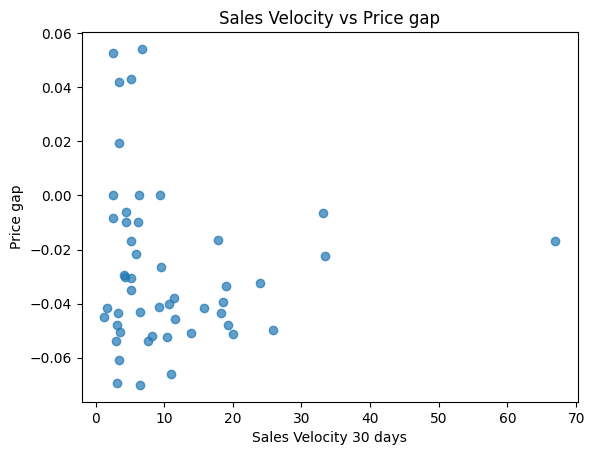

In [48]:
plt.figure()
plt.scatter(master['sales_velocity_30d'],master['price_gap_pct'],alpha=0.7)
plt.xlabel('Sales Velocity 30 days')
plt.ylabel('Price gap')
plt.title('Sales Velocity vs Price gap')
plt.show()

The above plot shows the relationship between Sales velocity and price gap.Products which are priced above the market level tends to sell slowly while products which are priced below the market prices tends to have more sales velocity.

#Deciding the Pricing Strategy Framework
The main components that affect the pricing logic are:
1.Demand (Sales velocity,Average units sold)
2.Inventory pressure(Days of inventory cover)
3.Market(Competitor price gap)
4.Advertising efficiency
5.Return rate which implies quality
6.Margin

**Demand:** High Demand shows that the product is fast moving. Customers are

ready to buy the product even if the price is slightly increased. There is a possibility to increase price when demand is high.Whereas low demand shows that the customers are not interested in buying the product and the price could not be further increased. The price should be decreased in this case.

**Inventory pressure:** High days of inventory cover suggests that the product is more in stock. In this case,it is essential to increase the sales. The price can be decreased in this case.Whereas low inventory cover suggests that the product is moving quickly and the price of the product can be increased or can be put on hold in this case.

**Market level/Competitor prices** : If the price gap between the product's current price and average market price is negative, there is a room to increase the price. Whereas if the price gap is positive,the product will be considered more expensive than the competitors and the price should be decreased in this case.

**Advertising Efficiency**: Higher return on ad spend shows that the customers are ready to buy the product in the current price and there is room for price increase. Whereas, if the ROAS is low,it means that the price should be reduced to attract more customers.

**Return Rate**: If the return rate for the past 30 days is higher, it shows that there is a quality issue in the product.In this case,increasing price will be riskier.If the return rate is lower,it shows that customers are satisfied with the product and in this case,price can be increased.

**Current Margin:**: If the current margin/profitability is lower, it means that the price of the product cannot be reduced further.Whereas if its high, we can decrease the price.



In [49]:
#Set all the pricing action to Hold

master['pricing_action'] = 'Hold'


In [50]:
#Pricing Logic: To increase the Price

master.loc[
    (master['days_of_inventory_cover'] < 30) &
    (master['sales_velocity_30d'] > master['avg_daily_units_sold']) &
    (master['price_gap_pct'] <= 0) &
    (master['roas'] > 2.5) &
    (master['return_rate_30d'] < 0.07),
    'pricing_action'
] = 'Increase Price'


In [51]:
#To Decrease the Price
#decrease_mask=(
#    (master['days_of_inventory_cover'] > 45) &
#    (master['sales_velocity_30d'] < master['avg_daily_units_sold']) &
#    (master['price_gap_pct'] >= -0.05)
#)

#decrease_mask.sum()




In [52]:
#To Decrease the Price
master.loc[
    (master['days_of_inventory_cover'] > 45) &
    (master['sales_velocity_30d'] < master['avg_daily_units_sold']) &
    (master['price_gap_pct'] >= -0.05),
    'pricing_action'
] = 'Decrease Price'

In [53]:
#To keep the price in hold
master.loc[
    (master['pricing_action']=='Decrease Price')&
    (master['current_margin_pct'] < master['minimum_acceptable_margin_']),
    'pricing_action'
] = 'Hold'


In [54]:
master['pricing_action'].value_counts()


,count
pricing_action,
Hold,42
Increase Price,4
Decrease Price,4


The analysis shows that majority of the SKUs are held at current prices without any explicit increase/decrease in the price. Only a small set of products out of the 50 products recommends for price increase/decrease as per the pricing logic.

In [55]:
summary=master[['sku','current_price','pricing_action','avg_competitor_price','price_gap_pct','sales_velocity_30d','avg_daily_units_sold','roas','days_of_inventory_cover','return_rate_30d','current_margin_pct']].sort_values('pricing_action')
summary

,sku,current_price,pricing_action,avg_competitor_price,price_gap_pct,sales_velocity_30d,avg_daily_units_sold,roas,days_of_inventory_cover,return_rate_30d,current_margin_pct
41,MN-42,73.90,Decrease Price,76.8,-0.037760,11.466667,13.923077,8.306706,53.292818,0.022099,0.570365
33,MN-34,32.90,Decrease Price,33.8,-0.026627,9.566667,11.000000,5.148450,53.454545,0.013986,0.551672
37,MN-38,29.90,Decrease Price,31.2,-0.041667,15.766667,17.142857,3.950825,53.550000,0.013462,0.531773
25,MN-26,29.90,Decrease Price,30.4,-0.016447,17.866667,18.274725,5.936545,62.217078,0.018040,0.540134
0,MN-01,38.90,Hold,36.9,0.054201,6.733333,6.208791,5.162245,53.633628,0.015929,0.569409
26,MN-27,28.90,Hold,29.9,-0.033445,19.066667,13.813187,4.856963,58.929196,0.016706,0.593426
27,MN-28,24.90,Hold,26.2,-0.049618,25.866667,27.252747,4.375907,41.096774,0.018145,0.528112
28,MN-29,21.90,Hold,22.8,-0.039474,18.600000,16.692308,4.347814,54.635945,0.047400,0.600457
29,MN-30,34.90,Hold,36.4,-0.041209,9.300000,7.560440,3.832464,39.547965,0.011628,0.520057
30,MN-31,28.90,Hold,29.8,-0.030201,4.366667,3.901099,3.713966,54.856338,0.019718,0.524221
